In [0]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import random

In [4]:
test_data= np.ndarray(shape=(512,512,4), dtype=np.integer)
for i in range(4):
  img = plt.imread(str(i+1)+'.gif')
  test_data[:,:,i] = np.array(img[:,:,0])
  print(img)

[[[ 41  41  41 255]
  [ 41  41  41 255]
  [ 38  38  38 255]
  ...
  [ 41  41  41 255]
  [ 41  41  41 255]
  [ 41  41  41 255]]

 [[ 41  41  41 255]
  [ 42  42  42 255]
  [ 41  41  41 255]
  ...
  [ 44  44  44 255]
  [ 41  41  41 255]
  [ 41  41  41 255]]

 [[ 41  41  41 255]
  [ 43  43  43 255]
  [ 39  39  39 255]
  ...
  [ 42  42  42 255]
  [ 40  40  40 255]
  [ 40  40  40 255]]

 ...

 [[ 39  39  39 255]
  [ 38  38  38 255]
  [ 38  38  38 255]
  ...
  [ 38  38  38 255]
  [ 39  39  39 255]
  [ 37  37  37 255]]

 [[ 40  40  40 255]
  [ 39  39  39 255]
  [ 40  40  40 255]
  ...
  [ 38  38  38 255]
  [ 39  39  39 255]
  [ 37  37  37 255]]

 [[ 41  41  41 255]
  [ 42  42  42 255]
  [ 42  42  42 255]
  ...
  [ 38  38  38 255]
  [ 38  38  38 255]
  [ 37  37  37 255]]]
[[[ 27  27  27 255]
  [ 27  27  27 255]
  [ 25  25  25 255]
  ...
  [ 27  27  27 255]
  [ 28  28  28 255]
  [ 28  28  28 255]]

 [[ 26  26  26 255]
  [ 27  27  27 255]
  [ 27  27  27 255]
  ...
  [ 30  30  30 255]
  [ 28  28  

In [5]:
test_data

array([[[41, 27, 26, 42],
        [41, 27, 29, 41],
        [38, 25, 26, 40],
        ...,
        [41, 27, 27, 32],
        [41, 28, 27, 33],
        [41, 28, 28, 33]],

       [[41, 26, 26, 43],
        [42, 27, 27, 43],
        [41, 27, 28, 42],
        ...,
        [44, 30, 30, 33],
        [41, 28, 32, 33],
        [41, 28, 28, 33]],

       [[41, 26, 26, 43],
        [43, 27, 26, 43],
        [39, 26, 27, 41],
        ...,
        [42, 28, 31, 35],
        [40, 27, 32, 33],
        [40, 28, 28, 33]],

       ...,

       [[39, 25, 23, 33],
        [38, 24, 23, 31],
        [38, 23, 21, 33],
        ...,
        [38, 22, 20, 22],
        [39, 23, 19, 27],
        [37, 23, 21, 24]],

       [[40, 25, 24, 37],
        [39, 24, 25, 33],
        [40, 25, 24, 35],
        ...,
        [38, 23, 20, 23],
        [39, 23, 19, 31],
        [37, 22, 21, 22]],

       [[41, 26, 25, 39],
        [42, 27, 29, 38],
        [42, 28, 29, 38],
        ...,
        [38, 22, 20, 25],
        [38, 23

In [6]:
im=plt.imread('PDCV1.jpeg')
print(im.shape)
# im=im.flatten()
im = (im>(0.5*255))*1
riverCount=np.sum(im==1)
im.shape

(512, 512)


(512, 512)

In [0]:
def coordinates(im):
  nonRiverCoordinates=[]
  riverCoordinates=[]
  cnt=0
  for i in range(512):
    for j in range(512):
      if(im[i][j]==1):
        riverCoordinates.append((i,j))
      else:
        nonRiverCoordinates.append((i,j))
  # print(nonRiverCoordinates)

  riverCoordinates=random.sample(riverCoordinates, 50)
  nonRiverCoordinates=random.sample(nonRiverCoordinates, 100)
  return riverCoordinates,nonRiverCoordinates

In [8]:
riverCoordinates, nonRiverCoordinates=coordinates(im)
print(riverCoordinates)

[(144, 176), (36, 161), (85, 175), (36, 154), (105, 180), (16, 155), (264, 199), (372, 193), (497, 143), (248, 200), (348, 218), (2, 149), (305, 219), (257, 204), (331, 210), (106, 177), (390, 180), (18, 151), (192, 170), (302, 219), (175, 159), (455, 181), (17, 151), (305, 208), (396, 187), (42, 156), (248, 181), (350, 197), (309, 214), (342, 223), (395, 183), (186, 167), (89, 185), (223, 182), (184, 162), (158, 156), (64, 169), (400, 188), (473, 171), (252, 181), (314, 207), (303, 226), (246, 199), (1, 142), (479, 162), (109, 172), (131, 173), (362, 200), (348, 215), (231, 184)]


In [0]:
n=512*512
dt=np.ndarray(shape=(n,4))
for i in range(4):
  cnt=0
  for j in range(512):
    for k in range(512):
      dt[cnt][i]=test_data[ j][k][i ]
      cnt+=1

In [0]:
def pca(dt,param):
  row=dt.shape[0]
  col=dt.shape[1]
  meanMatrix=np.mean(dt,axis=0)
  deviationMatrix=np.subtract(dt,meanMatrix)
  covMatrix=np.dot(deviationMatrix.T,deviationMatrix)*(1/row)

  eigenValue,eigenVector = np.linalg.eig(covMatrix)
  EigenVectorValue=[(eigenValue[i],eigenVector[i])for i in range(len(eigenValue))]
  EigenVectorValue.sort(reverse=True)
  W=np.ndarray(shape=(param,col))
  for i in range(param):
    W[i,:]=EigenVectorValue[i][1]
  W=np.transpose(W)
  return np.dot(dt,W)

In [0]:
K=2
reducedMatrix=pca(dt,K)

In [12]:
newImg=np.ndarray(shape=(512,512,K))
for param in range(2):
  m=0
  for j in range(512):
    for k in range(512):
      newImg[j][k][param]=reducedMatrix[m][param]
      m+=1
print(newImg.shape)

(512, 512, 2)


In [13]:
riverReduced=np.ndarray(shape=(50,K))
nonRiverReduced=np.ndarray(shape=(100,K))
for i in range(2):
  for j in range(50):
    riverReduced[j][i]=newImg[ riverCoordinates[j][0],riverCoordinates[j][1],i ]
for i in range(2):
  for j in range(100):
    nonRiverReduced[j][i]=newImg[ nonRiverCoordinates[j][0],nonRiverCoordinates[j][1],i ]

nonRiverReduced.shape

(100, 2)

In [0]:
def probRiver_NonRiver(i,j,riverCov,nonRiverCov,newImg):

  meanRiverReduced=np.mean(riverReduced,axis=0)
  meanNonRiverReduced=np.mean(nonRiverReduced,axis=0)
  riverDeviation = np.subtract(newImg[i,j,:],meanRiverReduced)
  nonRiverDeviation = np.subtract(newImg[i,j,:],meanNonRiverReduced)

  riverImgs = np.dot(np.dot(riverDeviation.T,np.linalg.inv(riverCov)),riverDeviation)
  nonRiverImgs = np.dot(np.dot(nonRiverDeviation.T,np.linalg.inv(nonRiverCov)), nonRiverDeviation)

  probRiver = (-0.5) * 1/np.sqrt(np.linalg.det(riverCov)) * np.exp(riverImgs);
  probNonRiver = (-0.5) * 1/np.sqrt(np.linalg.det(nonRiverCov)) * np.exp(nonRiverImgs);
  return probRiver,probNonRiver

In [0]:
def prediction(newImg,riverReduced,nonRiverReduced):

  meanMatrix=np.mean(riverReduced,axis=0)
  deviationMatrix=np.subtract(riverReduced,meanMatrix)
  riverCov=np.dot(deviationMatrix.T,deviationMatrix)*(1/riverReduced.shape[0])

  meanMatrix=np.mean(nonRiverReduced,axis=0)
  deviationMatrix=np.subtract(nonRiverReduced,meanMatrix)
  nonRiverCov=np.dot(deviationMatrix.T,deviationMatrix)*(1/nonRiverReduced.shape[0])

  classifiedImage=np.ndarray(shape=(512, 512), dtype = np.integer)
  for row in range(512):
    for col in range(512):
      probRiver,probNonRiver = probRiver_NonRiver(row,col,riverCov,nonRiverCov,newImg)
      if((1/3 * probRiver) >= (2/3 * probNonRiver)):
          classifiedImage[row,col]=255
      else:
          classifiedImage[row,col]=0
                
  return classifiedImage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


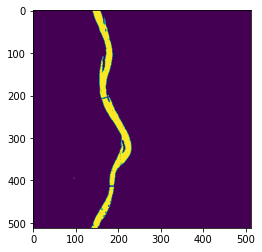

In [16]:
classifiedImage = prediction(newImg,riverReduced,nonRiverReduced)
plt.imshow(classifiedImage)